# Face Recognition
---

**Project description** <br>
Design a face recognition system using the eigenface method you have learned in
class. You will be given a set of M training images and another set of test images. Use the training
images to produce a set of eigenfaces. Then recognize the face in the input image using the eigenface
method. Use Euclidean distance as distance measure for computing $d_i$ , for i = 0 to M. You can
manually choose the thresholds $T_0$ and $T_1$ that produce the best results.

What to hand in:
+ An **MS Words file** that contains your **source code** (with full comments and documentation), the **language and  compiler** used, **instructions on how to compile and run** your program, and the following: 
    - The manually chosen thresholds $T_0$ and $T_1$ , the mean face m, and the M eigenfaces. The eigenfaces are contained in the matrix U, with each column represents an eigenface. You can output each eigenface as an N $\times$ N image.
    - The PCA coefficients ($Ω_i$) for each training image. 
    - For each test image: the image after subtracting the mean face I, its PCA coefficients ($Ω_i$), the reconstructed face image ($I_R$), distances $d_i$ for i = 0 to M, and classification result (non-face, unknown face, or identify of face.)

+ **Your executable code**, the original **output image** files as described in (a) above as individual files.

<hr>
**Dataset Description:**<br>
- It consists of a set of 17 grayscale face images (in JPG format). Each image is of dimension 195 x 231 (width x height) pixels and each pixel uses 8 bits for grayscale. 
- Use the following 8 images as training images: subject01.normal, subject02.normal, subject03.normal, subject07.normal, subject10.normal, subject11.normal, subject14.normal and subject15.normal. Use all 17 images (including the 8 training images) in the dataset as test images. 
- Non-face image: A non-face image (apple1) in JPG format is attached. This image is also of dimension 195 x 231. In addition to the 17 face images,  test your algorithm on this non-face image. 

Note: In the lecture slides, the training and test images are of size N X N (same horizontal and vertical dimensions.) The face images in the above dataset have different horizontal and vertical dimensions, but the Eigenface method works the same way and with no changes to the formulas. 

In [2]:
# Metadata
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -u -n -t -z
%watermark -p numpy,matplotlib
%watermark

Vutsal Singhal
last updated: Thu Dec 07 2017 18:22:35 EST
numpy 1.13.3
matplotlib 2.1.0
2017-12-07T18:22:37-05:00

CPython 3.5.2
IPython 6.2.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.10.0-40-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 8
interpreter: 64bit


In [59]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os

## Read Images

In [60]:
dataset_path = 'Dataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

Train Images:


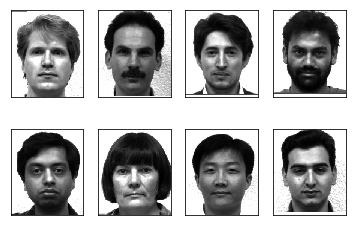

Test Images:


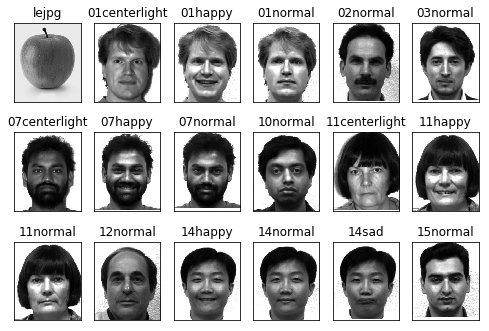

In [61]:
print('Train Images:')
train_image_names = ['subject01.normal.jpg', 'subject02.normal.jpg', 'subject03.normal.jpg', 'subject07.normal.jpg', 'subject10.normal.jpg', 'subject11.normal.jpg', 'subject14.normal.jpg', 'subject15.normal.jpg']
training_tensor   = np.ndarray(shape=(len(train_image_names), height*width), dtype=np.float64)

for i in range(len(train_image_names)):
    img = plt.imread(dataset_path + train_image_names[i])
    training_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

print('Test Images:')
test_image_names = dataset_dir#[i for i in dataset_dir if i not in train_image_names]
testing_tensor   = np.ndarray(shape=(len(test_image_names), height*width), dtype=np.float64)

for i in range(len(test_image_names)):
    img = imread(dataset_path + test_image_names[i])
    testing_tensor[i,:] = np.array(img, dtype='float64').flatten()
    plt.subplot(3,6,1+i)
    plt.title(test_image_names[i].split('.')[0][-2:]+test_image_names[i].split('.')[1])
    plt.imshow(img, cmap='gray')
    plt.subplots_adjust(right=1.2, top=1.2)
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Mean face

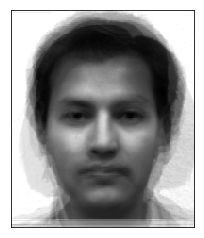

In [62]:
mean_face = np.zeros((1,height*width))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(train_image_names))).flatten()

plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Normalised faces

In [63]:
normalised_training_tensor = np.ndarray(shape=(len(train_image_names), height*width))

for i in range(len(train_image_names)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

### Display normalised faces

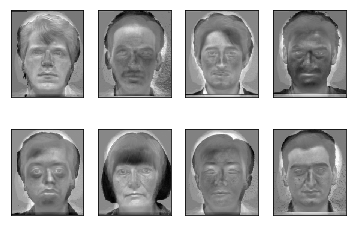

In [64]:
for i in range(len(train_image_names)):
    img = normalised_training_tensor[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Covariance matrix

In [65]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,8.0)
print('Covariance matrix of X: \n%s' %cov_matrix)

Covariance matrix of X: 
[[ 240.21425354  -54.37445049  -49.91300972 -167.04449305    6.71011608
    95.13549119   51.86167951 -122.58958706]
 [ -54.37445049  271.21637481  -39.69264581   66.46457924  -62.78262301
  -159.33970561  -96.7188796    75.22735047]
 [ -49.91300972  -39.69264581  223.857185     46.24225037  -32.6657127
  -134.1771553   -35.12864547   21.47773363]
 [-167.04449305   66.46457924   46.24225037  345.77440281  -80.00529939
  -267.06328206  -73.29909108  128.93093316]
 [   6.71011608  -62.78262301  -32.6657127   -80.00529939  256.35235515
   -63.58037876   53.02911913  -77.05757652]
 [  95.13549119 -159.33970561 -134.1771553  -267.06328206  -63.58037876
   747.14220277    1.26270451 -219.37987674]
 [  51.86167951  -96.7188796   -35.12864547  -73.29909108   53.02911913
     1.26270451  238.6557604  -139.66264741]
 [-122.58958706   75.22735047   21.47773363  128.93093316  -77.05757652
  -219.37987674 -139.66264741  333.05367046]]


In [66]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[ 0.24216786 -0.23304127  0.35355339 -0.54650028  0.34900164  0.24263134
  -0.46008264 -0.26652539]
 [-0.2320557   0.21004915  0.35355339  0.28336041  0.66156373 -0.40750816
   0.14797794 -0.26666354]
 [-0.15104702 -0.0756895   0.35355339  0.19555006 -0.49779746 -0.46987952
  -0.57605919 -0.08822017]
 [-0.41563654  0.18098142  0.35355339 -0.49133856 -0.36828479  0.0496277
   0.45683638 -0.28510056]
 [ 0.05114387 -0.48868195  0.35355339 -0.17720876  0.0789403  -0.29622126
   0.28068609  0.65529232]
 [ 0.73015769  0.53226997  0.35355339  0.03110374 -0.15710617 -0.06932017
   0.14579398  0.08274941]
 [ 0.14350419 -0.47101419  0.35355339  0.52641965 -0.14266291  0.41459652
   0.25325285 -0.31472933]
 [-0.36823436  0.34512637  0.35355339  0.17861375  0.07634566  0.53607356
  -0.2484054   0.48319727]]

Eigenvalues of Cov(X): 
[  1.11554951e+03   4.85892625e+02  -8.47167977e-14   1.22955135e+02
   2.95284929e+02   1.76427142e+02   2.32097712e+02   2.28059153e+02]


In [67]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eigenvalues))]

## Find cumulative variance of each principle component

Cumulative proportion of variance explained vector: 
[ 0.41996902  0.60289218  0.7140576   0.80143503  0.88729207  0.95371129
  1.          1.        ]


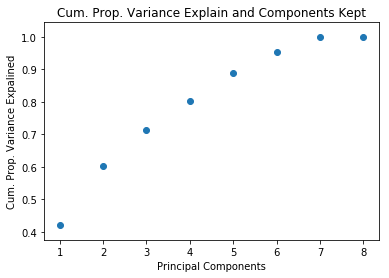

In [68]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

## Choose the necessary no.of principle components:

In [81]:
reduced_data = np.array(eigvectors_sort[:]).transpose()

Now we try to find the projected data. This will form the eigen space.

In [82]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

## Plot eigen faces

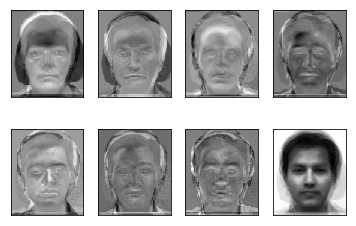

In [84]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    plt.subplot(2,4,1+i)
    plt.imshow(img, cmap='gray')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

## Finding weights for each traning image

In [85]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])
w

array([[  8.48287612e+07,  -5.81765456e+07,   4.32101930e+07,
         -7.76647463e+07,  -3.06341089e+07,   3.58272786e+07,
         -3.53176153e+07,   3.65986944e+08],
       [ -8.90553605e+07,   4.26457404e+07,   6.83431225e+07,
          2.56112699e+07,  -1.89660204e+07,  -3.27984752e+07,
          1.63052275e+07,  -1.88968379e+08],
       [ -6.49888673e+07,  -1.91766896e+07,  -5.08976401e+07,
         -6.15416348e+07,  -1.02271740e+07,  -2.29160969e+07,
          4.87793668e+06,   2.58201554e+08],
       [ -1.63772788e+08,   3.62801041e+07,  -4.07933003e+07,
          4.85649446e+07,  -2.11225024e+07,  -2.23707416e+06,
         -1.88350738e+07,  -5.22873512e+07],
       [  2.50823074e+07,  -7.92886248e+07,   6.20549912e+06,
          3.76311039e+07,   5.70068630e+07,  -2.62025963e+07,
         -3.84041861e+06,  -7.23023548e+07],
       [  3.03507468e+08,   1.07059520e+08,  -2.15641534e+07,
          4.34624113e+07,   1.37673278e+07,  -2.06872576e+07,
          1.02386688e+07,  -5.8

## Now we recognise unknown face!

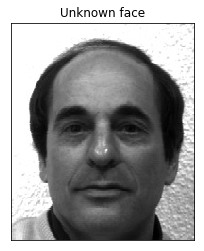

In [86]:
unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Normalise unknown face

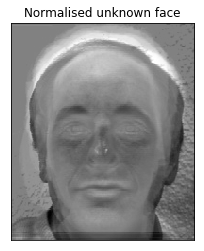

In [87]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

### Wieghts of uknown face

Projecting the normalized vector onto the eigenspace, to find out the weights:

In [88]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([ -4.70038929e+07,  -1.65543498e+08,   2.16510446e+07,
        -1.60182424e+08,  -3.66812704e+07,   9.24751216e+07,
        -3.78133854e+07,   3.03560604e+09])

Finding the $min|W - W_{unknown}|$

In [89]:
diff  = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
norms

array([  2.67699446e+09,   3.24015846e+09,   2.78685363e+09,
         3.10588163e+09,   3.12011469e+09,   3.65602580e+09,
         2.96379171e+09,   2.85798459e+09])

## Reconizing all test images

[  3.78900202e+08   2.54387839e+08   2.91412395e+08   2.28021414e+08
   1.76047507e+08   6.66595063e+08   1.44049824e+08   2.82293211e+08]
Min:  144049824.286  Max:  666595063.379
[  6.60077183e+08   1.82328496e+08   5.62260255e+08   3.26614172e+08
   2.43712657e+08   4.19503651e+08   3.82053192e+08   5.22817411e+08]
Min:  182328496.109  Max:  660077182.904
[  1.38036582e+09   8.50841563e+08   1.28488655e+09   1.00260622e+09
   9.53526022e+08   4.25000250e+08   1.09973640e+09   1.23469770e+09]
Min:  425000249.943  Max:  1380365821.0
[  6.14236865e+08   2.02296374e+08   5.30822940e+08   3.26056124e+08
   2.00535909e+08   4.35528744e+08   3.30969234e+08   5.03879463e+08]
Min:  200535909.268  Max:  614236865.152


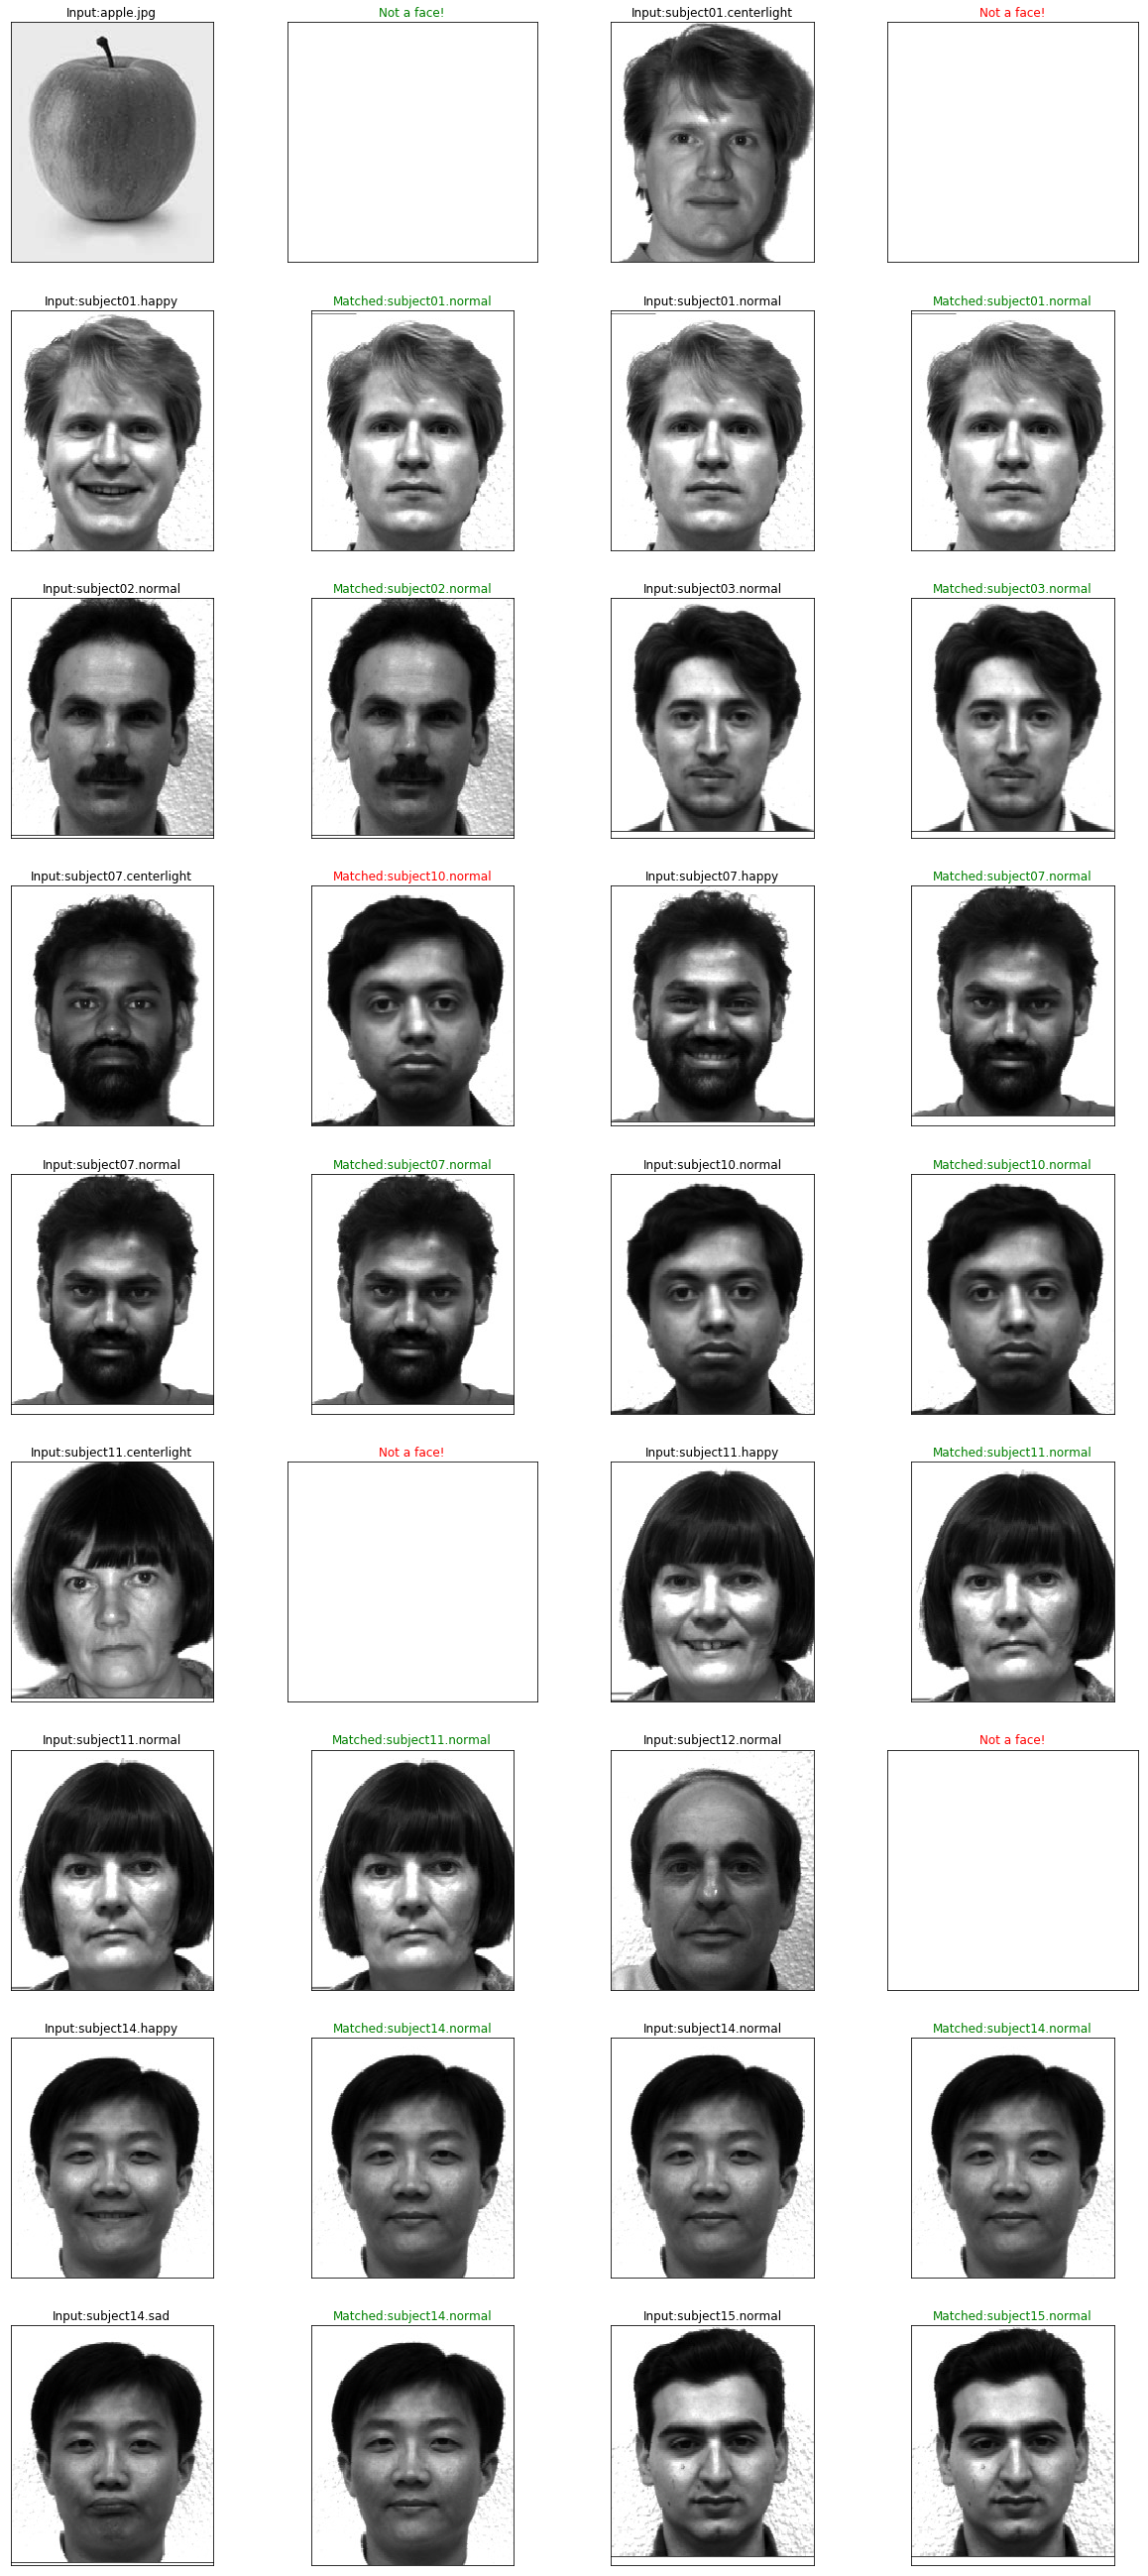

In [105]:
count = 0
m = 0
def recogniser(img, train_image_names,proj_data,w):
    global count,m
    unknown_face        = plt.imread('Dataset/'+img)
    unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()
    normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)
    
    plt.subplot(9,4,1+count)
    plt.imshow(unknown_face, cmap='gray')
    plt.title('Input:'+'.'.join(img.split('.')[:2]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    max_dist = 372921393.11795735
    #t1 = 0.3*max_dist # = 186460696.55897868
    t1 = 143951378.9
    
    if norms[index] < t1:
        plt.subplot(9,4,1+count)
        plt.imshow(imread('Dataset/'+train_image_names[index]), cmap='gray')
        if img.split('.')[0] == train_image_names[index].split('.')[0]:
            plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='g')
        else:
            plt.title('Matched:'+'.'.join(train_image_names[index].split('.')[:2]), color='r')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
        plt.subplots_adjust(right=1.2, top=2.5)
    else:
        print(norms)
        print('Min: ',min(norms), ' Max: ',max(norms))
        
        plt.subplot(9,4,1+count)
        if len(img.split('.')) == 3:
            plt.title('Not a face!', color='r')
        else:
            plt.title('Not a face!', color='g')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1

fig = plt.figure(figsize=(15, 15))
for i in range(len(test_image_names)):
    recogniser(test_image_names[i], train_image_names,proj_data,w)

plt.show()